<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('train.csv')
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

In [154]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\_(ツ)_/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\_(ツ)_/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


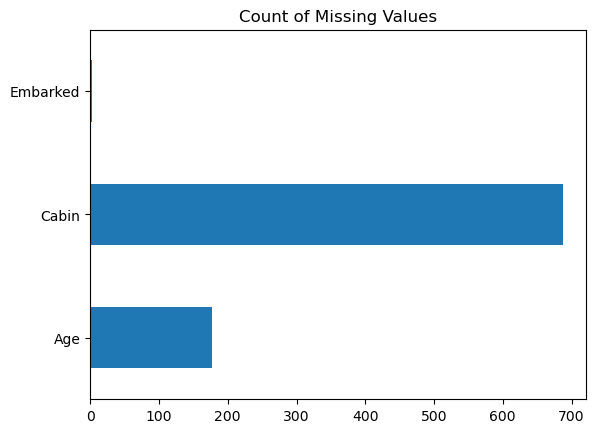

In [9]:
train.isnull().sum()[train.isnull().sum() != 0].plot(kind='barh')
plt.title('Count of Missing Values');

In [10]:
missing_values = train.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [12]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [14]:
train = train[train['Embarked'].notnull()]
train['Embarked'].isnull().sum()

0

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [16]:
train['Cabin'] = train['Cabin'].fillna(r'¯\_(ツ)_/¯')
train['Cabin'].value_counts()

Cabin
¯\_(ツ)_/¯      687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [21]:
train['FamilyCount'] = train['SibSp'] + train['Parch']

In [22]:
train[['Parch','SibSp','FamilyCount']]

,Parch,SibSp,FamilyCount
0,0,1,1
1,0,1,1
2,0,0,0
3,0,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,2,1,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [27]:
train['IsReverend'] = np.where(train['Name'].str.contains('Rev'), 1, 0)

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [36]:
Embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked')

In [38]:
Sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex')

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [242]:
round(train['Survived'].mean(),4)

0.3825

#### 2. Which gender fared the worst? What was their survival rate?

In [240]:
round(train.groupby(['Sex'])[['Survived']].mean(),4)

,Survived
Sex,
female,0.7404
male,0.1889


#### 3. What was the survival rate for each `Pclass`?

In [244]:
round(train.groupby(['Pclass'])[['Survived']].mean(),4)

,Survived
Pclass,
1,0.6262
2,0.4728
3,0.2424


#### 4. Did any reverends survive? How many?`

In [246]:
round(train.groupby(by = ['IsReverend'])[['Survived']].mean(),4)

,Survived
IsReverend,
0,0.3851
1,0.0000


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [249]:
round(train[train['Cabin'] == '¯\\_(ツ)_/¯'][['Survived']].mean(),4)

Survived    0.2999
dtype: float64

#### 6. What is the survival rate for people whose `Age` is empty?

In [252]:
round(train[train['Age'].isnull()][['Survived']].mean(),4)

Survived    0.2938
dtype: float64

####  7. What is the survival rate for each port of embarkation?

In [255]:
round(train.groupby(['Embarked'])['Survived'].mean(),4)

Embarked
C    0.5536
Q    0.3896
S    0.3370
Name: Survived, dtype: float64

#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [258]:
round(train[train['Age']<=12].groupby(by = ['Pclass'])['Survived'].mean(),4)

Pclass
1    0.7500
2    1.0000
3    0.4167
Name: Survived, dtype: float64

####  9. Did the captain of the ship survive? Is he on the list?

In [261]:
train[train['Name'].str.contains('Cap')][['Name','Survived']]

,Name,Survived
745,"Crosby, Capt. Edward Gifford",0


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [265]:
top_fare = train[train['Survived'] == 0]['Fare'].max()
train[(train['Survived']) & (train['Fare'] == top_fare)][['Name','Fare']]

,Name,Fare
88,"Fortune, Miss. Mabel Helen",263.0
341,"Fortune, Miss. Alice Elizabeth",263.0


#### 11. Does having family on the boat help or hurt your chances of survival?

In [267]:
round(train.groupby(by = ['FamilyCount']).agg(Survived_sum=('Survived', 'sum'), Survived_mean=('Survived', 'mean')),4)

,Survived_sum,Survived_mean
FamilyCount,,
0,161,0.3009
1,89,0.5528
2,59,0.5784
3,21,0.7241
4,3,0.2000
5,3,0.1364
6,4,0.3333
7,0,0.0000
10,0,0.0000


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


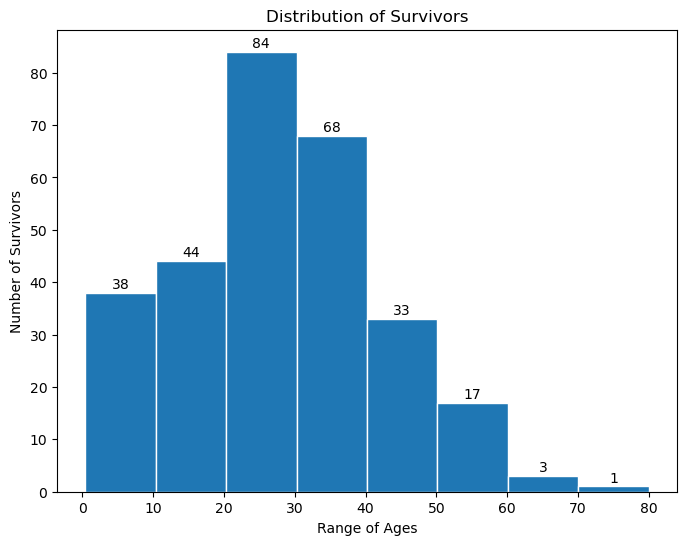

In [229]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(x='Age', data=train_survived, bins=8, edgecolor='white')

ax.set_title('Distribution of Survivors')
ax.set_xlabel('Range of Ages')
ax.set_ylabel('Number of Survivors')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=1)
    
plt.show()


In [230]:
class_family_grouped = train_survived.groupby(['Pclass', 'Sex'])['Survived'].sum().unstack()
class_family_grouped

Sex,female,male
Pclass,,
1,89,45
2,70,17
3,72,47


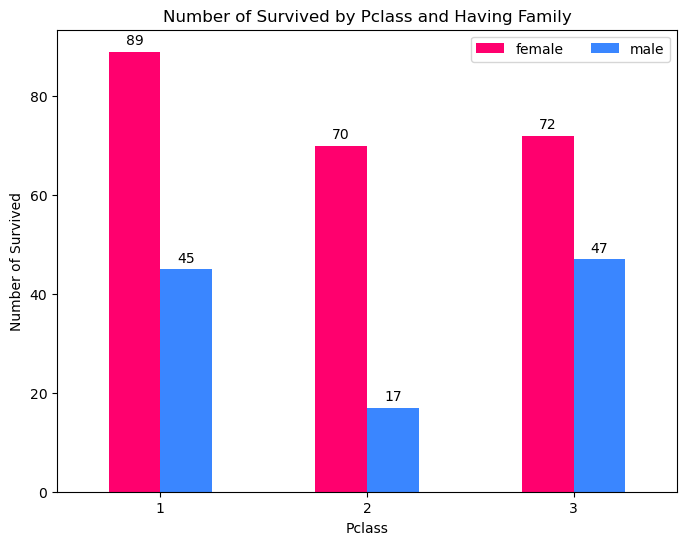

In [231]:
# Creating the subplot bar chart
fig, ax = plt.subplots(figsize=(8, 6))
color = ['#ff006e','#3a86ff']
# Plotting
class_family_grouped.plot(kind='bar', ax=ax, color = color)

# Customizing the plot
ax.set_title('Number of Survived by Pclass and Having Family')
ax.set_xlabel('Pclass')
ax.set_ylabel('Number of Survived')
ax.legend(loc='upper right', ncols=3)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
    
plt.xticks(rotation=0)
plt.show()

In [234]:
Sex_Age_grouped = train_survived.groupby(['Age', 'Sex'])['Survived'].count().reset_index()
Sex_Age_grouped


,Age,Sex,Survived
0,0.42,male,1
1,0.67,male,1
2,0.75,female,2
3,0.83,male,2
4,0.92,male,1
...,...,...,...
98,60.00,female,1
99,60.00,male,1
100,62.00,male,1
101,63.00,female,2


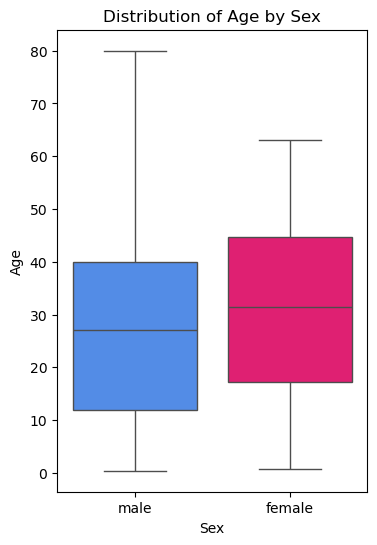

In [237]:
fig, ax = plt.subplots(figsize=(4, 6))

sns.boxplot(x='Sex', y='Age', data=Sex_Age_grouped, ax=ax, hue = 'Sex', palette=['#3a86ff', '#ff006e'])

# Customizing the plot
ax.set_title('Distribution of Age by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Age')

# Display the plot
plt.show()